In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [3]:
def get_metadata(path, suffix):
    files_df = pd.DataFrame(glob.glob(f'{path}'+f'/**/*.{suffix}', recursive=True))
    file_names = files_df[0].str.rsplit('/', n=2, expand=True)[[2]]
    query_name = file_names[2].str.rsplit(r'_', n=2, expand=True)[[0]]
    file_path = files_df[0].str.rsplit('/', n=1, expand=True)[[0]].astype(str)+'/'
    kmer_size = file_names[2].str.rsplit('_', n=2, expand=True)[[1]]

    out_df = pd.concat([kmer_size, query_name, file_names, file_path], axis=1)
    out_df.columns=['kmer_size', 'genotype', 'file', 'path']
    return out_df
# NOTE The files paths have been modifed
# my_names = get_metadata('/Volumes/quirozj/00_kmers/modern/kmers', 'txt')
# my_names

In [4]:
in_db = pd.read_csv('/Volumes/quirozj/00_kmers/pangenome/kmer_size_jf/arinalrfor-pg_31_histo.txt', delimiter=' ', header=None)
in_db

,0,1
0,1,4500531930
1,2,498999954
2,3,175475111
3,4,87151829
4,5,50833032
...,...,...
250,251,16659
251,252,16797
252,253,16481
253,254,16458


In [5]:
# metadata = get_metadata('/Users/quirozc/Documents/PhD_2020/01_thesis/chapter_2/images/01_kmer_size', 'txt')
# metadata = get_metadata('/Users/quirozc/Documents/PhD_2020/01_thesis/chapter_2/images/00_kmer_sizejelly', 'txt')
metadata=get_metadata('/Volumes/quirozj/00_kmers/pangenome/kmer_size_jf', 'txt')
metadata

,kmer_size,genotype,file,path
0,14,arinalrfor-pg,arinalrfor-pg_14_histo.txt,/Volumes/quirozj/00_kmers/pangenome/kmer_size_jf/
1,31,sy_mattis-pg,sy_mattis-pg_31_histo.txt,/Volumes/quirozj/00_kmers/pangenome/kmer_size_jf/
2,13,julius-pg,julius-pg_13_histo.txt,/Volumes/quirozj/00_kmers/pangenome/kmer_size_jf/
3,16,jagger-pg,jagger-pg_16_histo.txt,/Volumes/quirozj/00_kmers/pangenome/kmer_size_jf/
4,101,norin61-pg,norin61-pg_101_histo.txt,/Volumes/quirozj/00_kmers/pangenome/kmer_size_jf/
...,...,...,...,...
215,13,lancer-pg,lancer-pg_13_histo.txt,/Volumes/quirozj/00_kmers/pangenome/kmer_size_jf/
216,91,arinalrfor-pg,arinalrfor-pg_91_histo.txt,/Volumes/quirozj/00_kmers/pangenome/kmer_size_jf/
217,51,chinese-pg,chinese-pg_51_histo.txt,/Volumes/quirozj/00_kmers/pangenome/kmer_size_jf/
218,61,landmark-pg,landmark-pg_61_histo.txt,/Volumes/quirozj/00_kmers/pangenome/kmer_size_jf/


In [6]:
# metadata = get_metadata('/Users/quirozc/Documents/PhD_2020/01_thesis/chapter_2/images/01_kmer_size', 'txt')
# metadata = get_metadata('/Users/quirozc/Documents/PhD_2020/01_thesis/chapter_2/images/00_kmer_size_jelly', 'txt')
# metadata

In [7]:
kmer_size=51
def combine_db(samples, kmer_size):
    samples = samples[samples['kmer_size'] == str(kmer_size)]
    combined_df = pd.DataFrame()
    for index, row in samples.iterrows():
#         in_db = pd.read_csv(row['path']+row['file'], delimiter='\t', header=None)
        in_db = pd.read_csv(row['path']+row['file'], delimiter=' ', header=None)
        sample_name = row['genotype']
        combined_df[sample_name] = in_db[1]
    row_names = pd.Series(in_db[0], name='frequency')
    combined_df[sample_name] = in_db[1]
    concatenated_df = pd.concat([row_names, combined_df], axis=1)
    concatenated_df.insert(0, 'kmer_size', int(kmer_size))
    return concatenated_df

my_test = combine_db(metadata, kmer_size)
my_test

,kmer_size,frequency,norin61-pg,spelta-pg,mace-pg,sy_mattis-pg,lancer-pg,jagger-pg,stanley-pg,julius-pg,landmark-pg,arinalrfor-pg,chinese-pg
0,51,1,7281125000,7289344443,7284608565,7355529597,7255185874,7313764208,7290875084,7275217446,7256732310,7342434410,7297429577
1,51,2,496923573,519647810,518486171,525064278,520823637,517436401,500781252,505516384,497814690,538391632,507348735
2,51,3,157243999,171785052,168071369,172720739,167859804,161965509,160082096,160759240,159275699,173437216,163191649
3,51,4,74430950,82694345,82424102,84665350,82946809,76529841,75772125,76176443,75450147,85096889,77034096
4,51,5,43542297,46601639,45461713,46921759,45459013,44522477,44116948,44351985,44023361,47119688,44765480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,51,251,10721,10923,10896,11376,11088,11154,11011,11321,11178,11333,10839
251,51,252,10646,11085,10472,11206,10718,10835,10694,11067,11037,11351,10954
252,51,253,10781,10804,10768,10969,10939,10860,10791,11250,10804,11158,10737
253,51,254,10610,10778,10526,10967,10995,10957,10880,10812,10842,11304,10755


In [9]:
kmer_sizes = list(metadata['kmer_size'].unique())
# kmer_sizes

In [10]:
# kmer_sizes = ['51',  '101']
kmer_sizes = list(metadata['kmer_size'].unique())

dfs=[]
for kmer_size in kmer_sizes:
    combined_df = combine_db(metadata, kmer_size)
    dfs.append(combined_df)
kmer_dfs = pd.concat(dfs, axis=0)
kmer_dfs.sort_values(by=['kmer_size', 'frequency'],inplace=True)
kmer_dfs

,kmer_size,frequency,arinalrfor-pg,stanley-pg,chinese-pg,spelta-pg,lancer-pg,norin61-pg,sy_mattis-pg,jagger-pg,mace-pg,landmark-pg,julius-pg
0,12,3,8.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,12,4,6.0,2.0,5.0,6.0,2.0,5.0,3.0,2.0,1.0,3.0,4.0
2,12,5,16.0,1.0,17.0,7.0,4.0,8.0,2.0,4.0,4.0,1.0,3.0
3,12,6,37.0,10.0,39.0,13.0,9.0,16.0,6.0,2.0,7.0,11.0,4.0
4,12,7,32.0,18.0,38.0,29.0,18.0,36.0,15.0,20.0,17.0,17.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,101,251,3727.0,3734.0,3655.0,3629.0,3644.0,3605.0,3742.0,3713.0,3614.0,3624.0,4460.0
251,101,252,3716.0,3789.0,3757.0,3531.0,3656.0,3516.0,3817.0,3651.0,3568.0,3654.0,4194.0
252,101,253,3742.0,3704.0,3661.0,3601.0,3647.0,3575.0,3958.0,3622.0,3488.0,3617.0,3702.0
253,101,254,3532.0,3612.0,3666.0,3678.0,3644.0,3587.0,3773.0,3649.0,3431.0,3482.0,3848.0


In [11]:
kmer_dfs.to_csv('compiled_kmer_size_histo.tsv', sep='\t', index=False)

In [12]:
# kmer_dfs.set_index(['kmer_size','frequency'], inplace=True)

In [13]:
def melt_df(df):
    df_m = pd.melt(df, id_vars=['kmer_size', 'frequency'],
                   value_vars=df.columns[2:],
                   var_name='reference',
                   value_name='count')
    return df_m

df_melted = melt_df(kmer_dfs)
df_melted

,kmer_size,frequency,reference,count
0,12,3,arinalrfor-pg,8.0
1,12,4,arinalrfor-pg,6.0
2,12,5,arinalrfor-pg,16.0
3,12,6,arinalrfor-pg,37.0
4,12,7,arinalrfor-pg,32.0
...,...,...,...,...
56073,101,251,julius-pg,4460.0
56074,101,252,julius-pg,4194.0
56075,101,253,julius-pg,3702.0
56076,101,254,julius-pg,3848.0


In [14]:
kmer_sub = df_melted[(df_melted['kmer_size']==31) | (df_melted['kmer_size']==101)| (df_melted['kmer_size']==15)]
kmer_sub

,kmer_size,frequency,reference,count
763,15,1,arinalrfor-pg,194881449.0
764,15,2,arinalrfor-pg,140295572.0
765,15,3,arinalrfor-pg,100204705.0
766,15,4,arinalrfor-pg,72606224.0
767,15,5,arinalrfor-pg,53815008.0
...,...,...,...,...
56073,101,251,julius-pg,4460.0
56074,101,252,julius-pg,4194.0
56075,101,253,julius-pg,3702.0
56076,101,254,julius-pg,3848.0


(0.0, 101.0)

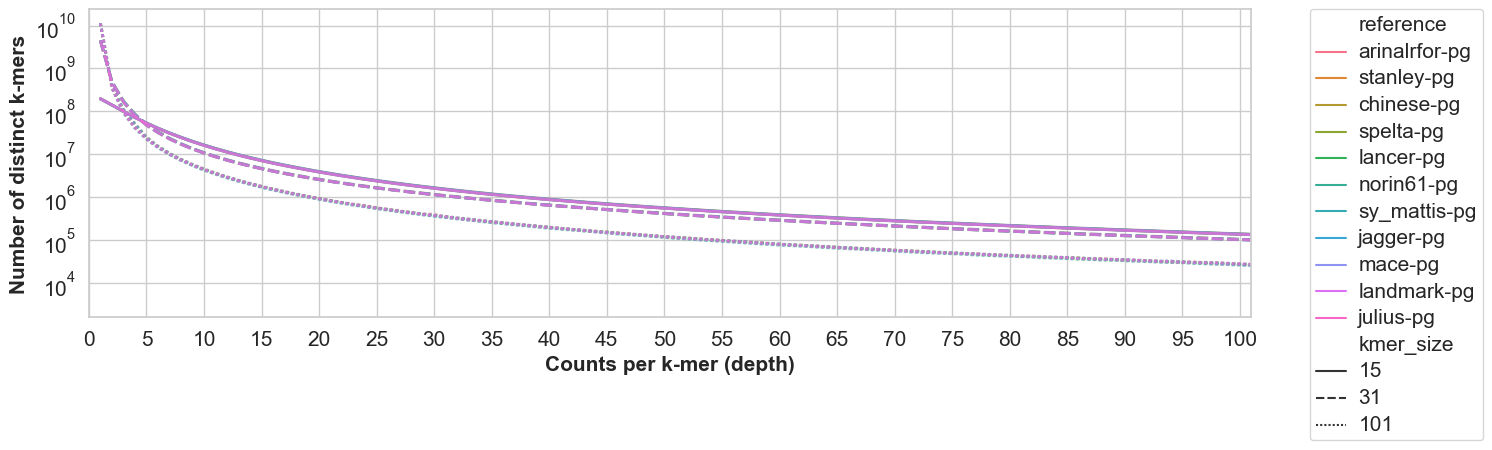

In [27]:
import seaborn as sns
font_s = 15
font_w = "bold"


sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 4))
# sns.scatterplot(data=kmer_sub, x="frequency", y="count", hue="reference", style="kmer_size", markers=True, lw=2, alpha=1, s=60)
sns.lineplot(data=kmer_sub, x="frequency", y="count", hue="reference", style="kmer_size", lw=2, alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.setp(ax.get_legend().get_texts(), fontsize='15')

# plt.title(f'Wheat pangenome k-mer distribution', fontweight=font_w, fontsize= font_s)
plt.ylabel('Number of distinct k-mers', fontsize = font_s, fontweight=font_w)
plt.xlabel('Counts per k-mer (depth)', fontsize = font_s, fontweight=font_w)
plt.yscale('symlog', base=10)
plt.xticks(list(range(0, 151, 5)),fontsize = font_s)
plt.yticks(fontsize = font_s)
plt.xlim(0,101)
# plt.xlim(list(range(0, 150,10)))


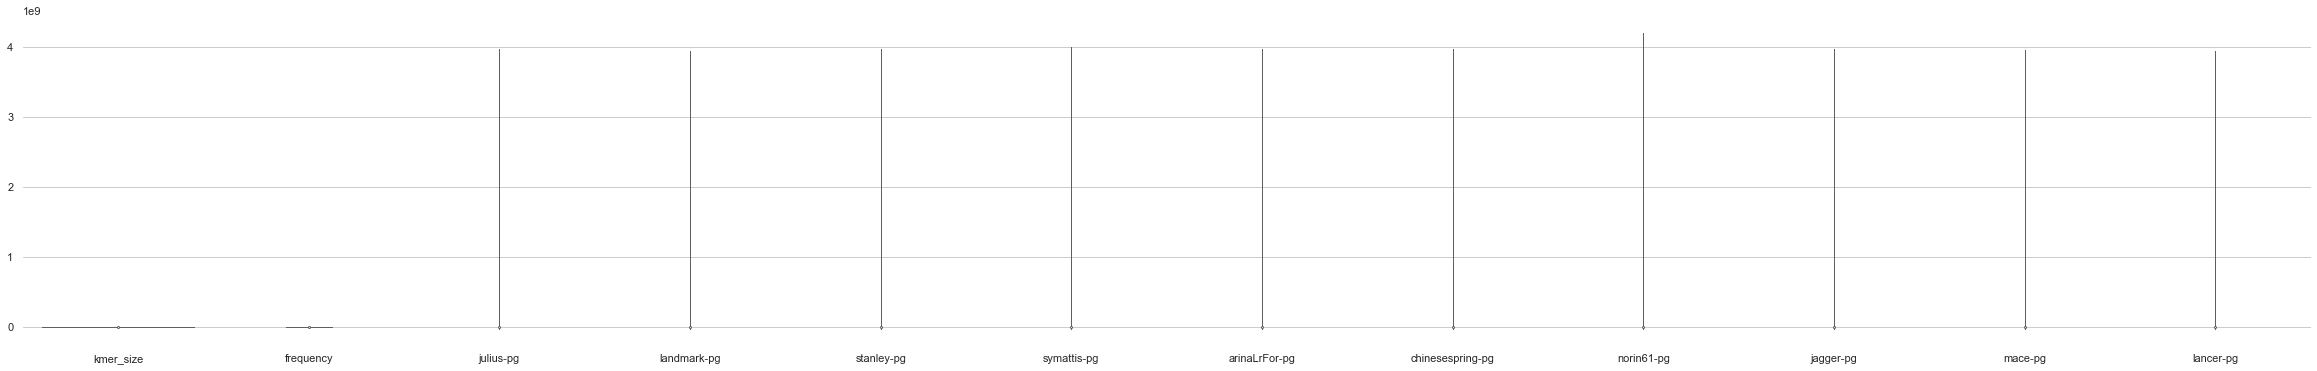

In [39]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(41, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=kmer_dfs, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
# ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

In [18]:
# corr_df

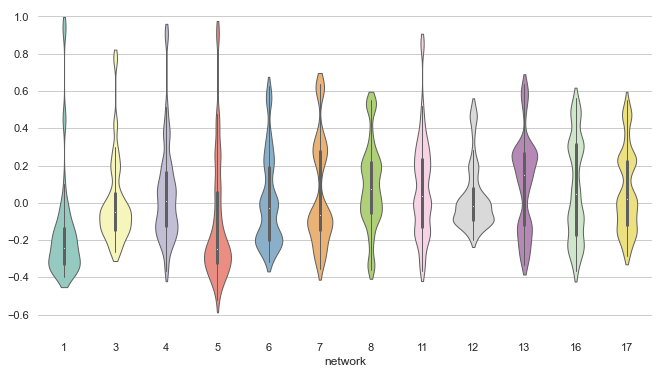

In [10]:
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

# recicle my functions

In [15]:
def unstack_df(df):
    df_piv = pd.pivot(df, values='group', index=['chr','start', 'end'], columns=['query']).reset_index()
    col_df = df_piv.columns.values[:].tolist()
    return pd.DataFrame(df_piv.iloc[:, :].values, columns=col_df)

def transpose_df(df):    
    df_t = df.set_index(['chr', 'start', 'end']).T
    return df_t

def select_genotypes(df, sample_list):
    filter_df = df.set_index(['chr', 'start', 'end']).filter(items=sample_list, axis=1)
    return filter_df.reset_index()

def get_region(df, chromosome, down_region, up_region):
    region_df = df[(df['end'] >= down_region) & (df['start'] <= up_region) & 
                   (df['chr'].str.contains(chromosome))]
    return region_df

def chr_length(df, chromosome):
    len_df = pd.read_csv(df, delimiter='\t', header=None)
    return len_df[len_df[0].str.contains(f'{chromosome}')][1].values[0]

def get_redundant(hap_df, comparisons_df, window, group):
    header_df = hap_df.iloc[:, :3]
    for index, row in comparisons_df.iterrows():
        header_df[row['comparison']] = np.where(hap_df[row['query1']] == hap_df[row['query2']], 1, 0)
    header_df_T= transpose_df(header_df)
    combined_df = pd.concat([comparisons_df.set_index('comparison'), header_df_T], axis=1).reset_index().rename(columns={"index": "comparison"})
    combined_df['sum'] = combined_df.sum(axis=1, numeric_only=True)
    combined_df['blocks_n'] = len(header_df_T.columns)
    combined_df['similarity'] = combined_df['sum']/len(header_df_T.columns)*100
    combined_df.insert(0, 'window', window)
    combined_df.insert(0, 'group', group)
#     combined_df.insert(0, 'sort', range(1, 1 + len(combined_df)))
    return combined_df